In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = './datasets/card_transdata.csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
chipandpin = data[["used_chip", "used_pin_number", "fraud"]]

In [6]:
totaltransactions = len(chipandpin)
total_fraud = chipandpin["fraud"].sum()
fraud_by_chip = chipandpin[chipandpin["used_chip"]==1]["fraud"].sum()
fraud_by_pin = chipandpin[chipandpin["used_pin_number"]==1]["fraud"].sum()

In [7]:
print("Total Transactions: ", totaltransactions)
print("Total Fraud Cases: ", total_fraud)
print(f"Fraud cases using card chips: {fraud_by_chip} out of {totaltransactions}")
print(f"Fraud cases using PIN: {fraud_by_pin} out of {totaltransactions}")

Total Transactions:  1000000
Total Fraud Cases:  87403.0
Fraud cases using card chips: 22410.0 out of 1000000
Fraud cases using PIN: 273.0 out of 1000000


Text(0.5, 0.98, 'Fraud cases in chip and pin transaction')

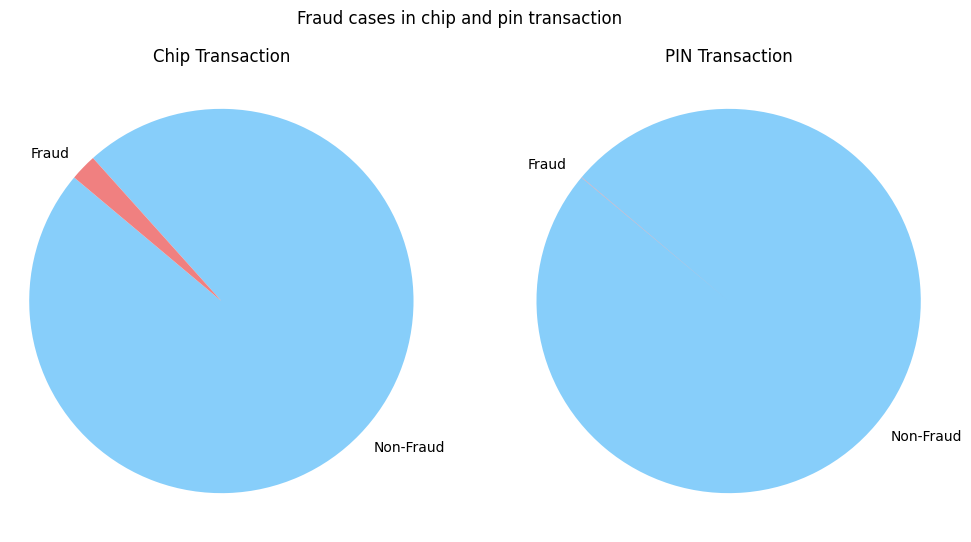

In [9]:
labels_chip = ["Non-Fraud", "Fraud"]
sizes_chip = [totaltransactions - fraud_by_chip, fraud_by_chip]
colors_chip = ["lightskyblue", "lightcoral"]
labels_chip = ["Non-Fraud", "Fraud"]
sizes_pin = [totaltransactions - fraud_by_pin, fraud_by_pin]
colors_chip = ["lightskyblue", "lightcoral"]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(sizes_chip, labels=labels_chip, colors=colors_chip, startangle=140)
plt.axis("equal")
plt.title("Chip Transaction")
plt.subplot(1,2,2)
plt.pie(sizes_pin, labels=labels_chip, colors=colors_chip, startangle=140)
plt.axis("equal")
plt.title("PIN Transaction")
plt.suptitle("Fraud cases in chip and pin transaction")